   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Using these features for clustering:
Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

Cluster Assigned:
   Cluster
0        2
1        2
2        2
3        2
4        2


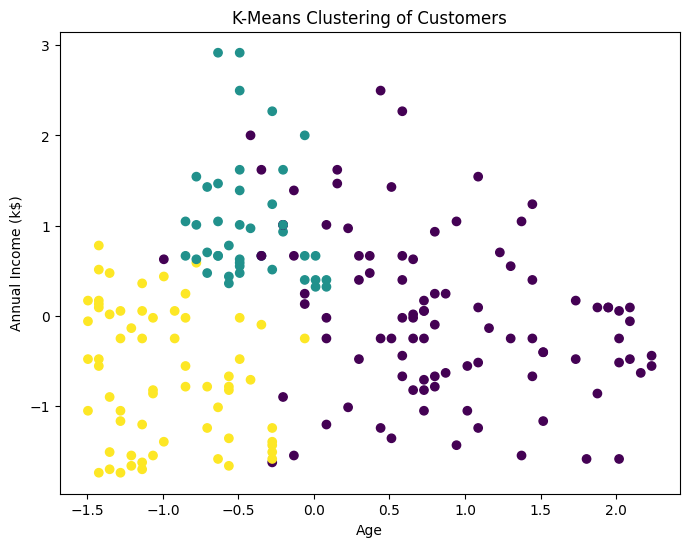


Cluster Centers (scaled):
[[ 0.82935381 -0.00348296 -0.65438593]
 [-0.43033758  1.02223317  1.15593564]
 [-0.98371627 -0.65995549  0.24488394]]


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ------------------------------------
# 1. Load Dataset
# ------------------------------------
df = pd.read_csv("/content/Mall_Customers .csv")
print(df.head())

# ------------------------------------
# 2. Select Numerical Columns for Clustering
# ------------------------------------
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Remove non-purchase or ID columns if needed
if 'CustomerID' in numeric_df.columns:
    numeric_df = numeric_df.drop('CustomerID', axis=1)

print("\nUsing these features for clustering:")
print(numeric_df.columns)

# ------------------------------------
# 3. Normalize Data
# ------------------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# ------------------------------------
# 4. Build K-Means Model (k = 3 clusters)
# ------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters

print("\nCluster Assigned:")
print(df[['Cluster']].head())

# ------------------------------------
# 5. Visualize Clusters (Using first 2 features)
# ------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters)
plt.xlabel(numeric_df.columns[0])
plt.ylabel(numeric_df.columns[1])
plt.title("K-Means Clustering of Customers")
plt.show()

# ------------------------------------
# 6. Show Cluster Centroids
# ------------------------------------
print("\nCluster Centers (scaled):")
print(kmeans.cluster_centers_)
